In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [68]:
data = pd.read_csv('AAPL.CSV')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,112.820000,113.129997,110.209999,110.379997,101.419060,41403400
1,2015-01-02,111.389999,111.440002,107.349998,109.330002,100.454300,53204600
2,2015-01-05,108.290001,108.650002,105.410004,106.250000,97.624336,64285500
3,2015-01-06,106.540001,107.430000,104.629997,106.260002,97.633545,65797100
4,2015-01-07,107.199997,108.199997,106.699997,107.750000,99.002556,40105900


In [69]:
x = data.iloc[:,1:2].values

In [70]:
sc = MinMaxScaler(feature_range=(0,1))
x = sc.fit_transform(x)

In [71]:
x[:10]

array([[0.1134646 ],
       [0.10635441],
       [0.09094074],
       [0.08223947],
       [0.08552107],
       [0.09561458],
       [0.11271877],
       [0.11237072],
       [0.1065533 ],
       [0.09466986]])

In [72]:
len(x)

1259

In [73]:
x_train = []
y_train = []
for i in range(25,1259):
    x_train.append(x[i-25:i,0])
    y_train.append(x[i,0])

In [74]:
x_train[0]

array([0.1134646 , 0.10635441, 0.09094074, 0.08223947, 0.08552107,
       0.09561458, 0.11271877, 0.11237072, 0.1065533 , 0.09466986,
       0.09944312, 0.08467581, 0.08870324, 0.09422234, 0.10073589,
       0.11087909, 0.11803897, 0.11147573, 0.13738066, 0.13086715,
       0.14120924, 0.13946899, 0.14170645, 0.14170645, 0.14926411])

In [75]:
y_train[0]

0.1492641097171865

In [76]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [77]:
x_train

array([[0.1134646 , 0.10635441, 0.09094074, ..., 0.14170645, 0.14170645,
        0.14926411],
       [0.10635441, 0.09094074, 0.08223947, ..., 0.14170645, 0.14926411,
        0.14926411],
       [0.09094074, 0.08223947, 0.08552107, ..., 0.14926411, 0.14926411,
        0.14195507],
       ...,
       [0.87281232, 0.86361379, 0.85814439, ..., 0.94734489, 0.96802907,
        0.96867548],
       [0.86361379, 0.85814439, 0.85874103, ..., 0.96802907, 0.96867548,
        1.        ],
       [0.85814439, 0.85874103, 0.8797733 , ..., 0.96867548, 1.        ,
        0.9917462 ]])

In [78]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [79]:
x_train

array([[[0.1134646 ],
        [0.10635441],
        [0.09094074],
        ...,
        [0.14170645],
        [0.14170645],
        [0.14926411]],

       [[0.10635441],
        [0.09094074],
        [0.08223947],
        ...,
        [0.14170645],
        [0.14926411],
        [0.14926411]],

       [[0.09094074],
        [0.08223947],
        [0.08552107],
        ...,
        [0.14926411],
        [0.14926411],
        [0.14195507]],

       ...,

       [[0.87281232],
        [0.86361379],
        [0.85814439],
        ...,
        [0.94734489],
        [0.96802907],
        [0.96867548]],

       [[0.86361379],
        [0.85814439],
        [0.85874103],
        ...,
        [0.96802907],
        [0.96867548],
        [1.        ]],

       [[0.85814439],
        [0.85874103],
        [0.8797733 ],
        ...,
        [0.96867548],
        [1.        ],
        [0.9917462 ]]])

In [80]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50,return_sequences=True , input_shape = (x_train.shape[1],1)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(50,return_sequences=True),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.LSTM(50,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [81]:
model.compile(optimizer = 'adam',
             loss = 'mean_squared_error')

In [82]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 25, 50)            10400     
_________________________________________________________________
dropout_16 (Dropout)         (None, 25, 50)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 25, 50)            20200     
_________________________________________________________________
dropout_17 (Dropout)         (None, 25, 50)            0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 25, 50)            20200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 25, 50)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 50)               

In [83]:
history = model.fit(x_train,y_train,epochs=10,batch_size = 128)

Train on 1234 samples
Epoch 1/10
1234/1234 [==============================] - 13s 11ms/sample - loss: 0.0608
Epoch 2/10
1234/1234 [==============================] - 2s 1ms/sample - loss: 0.0147
Epoch 3/10
1234/1234 [==============================] - 2s 1ms/sample - loss: 0.0073
Epoch 4/10
1234/1234 [==============================] - 2s 1ms/sample - loss: 0.0055
Epoch 5/10
1234/1234 [==============================] - 2s 2ms/sample - loss: 0.0051
Epoch 6/10
1234/1234 [==============================] - 2s 1ms/sample - loss: 0.0043
Epoch 7/10
1234/1234 [==============================] - 2s 1ms/sample - loss: 0.0039
Epoch 8/10
1234/1234 [==============================] - 2s 1ms/sample - loss: 0.0036
Epoch 9/10
1234/1234 [==============================] - 2s 1ms/sample - loss: 0.0035
Epoch 10/10
1234/1234 [==============================] - 2s 1ms/sample - loss: 0.0034


In [84]:
predictions = model.predict(x_train)

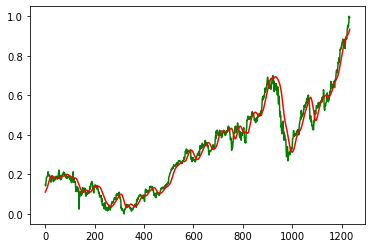

In [85]:
plt.plot(range(len(x_train)), y_train, c='g')
plt.plot(range(len(x_train)), predictions, c='r')